# Objectifs

L’objectif principal des méthodes d’apprentissage non supervisé est de grouper des éléments proches dans un même groupe d’une manière que deux éléments d’un même groupe soient le plus similaire possible et que deux éléments de deux groupes différents soient le plus dissemblables possible. 
Nous cherchons donc à minimiser la distance intra-classe et de maximiser la distance inter-classe. Plusieurs méthodes sont disponibles dans **Scikit- Learn**. Nous étudierons une d’entre elles de plus près dans ce TP.

# Partie 1 : Données de travail

Nous disposons d’un jeu de données **fromage.txt** qui comprend **29 instances de fromage**, représentées par **9 attributs** (**calories**, **sodium**, **calcium**, **lipides**, **retinol**, **folates**, **proteines**, **cholesterol** et **magnesium**).
Les instructions Python suivantes permettent de charger le jeu de données **fromage.txt**.

In [91]:
import pandas as pd
fromage=pd.read_table(r"fromage.txt",sep="\t",header=0,index_col=0)
fromage

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36
Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25
Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28


In [92]:
print(fromage.describe())

         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80.000000 

In [93]:
nombre_instances,nombre_attributs=fromage.shape
print('Le jeu de données fromage.txt comprend', nombre_instances, 'instances représentées chacune par', nombre_attributs , 'attributs :' , ", ".join(fromage.columns),'.')

Le jeu de données fromage.txt comprend 29 instances représentées chacune par 9 attributs : calories, sodium, calcium, lipides, retinol, folates, proteines, cholesterol, magnesium .


**À vous !**

**Comment sont réparties les données ?**

Le jeu de données **fromage.txt** comprend **29 instances** de fromage représentées par **9 attributs**.

**Quels sont les attributs de ce jeu de données ?**

Les attributs de ce jeu de données sont **calories**, **sodium**, **calcium**, **lipides**, **retinol**, **folates**, **proteines**, **cholesterol** et **magnesium**.

Nous allons visualiser la **matrice de distribution de données** grâce aux instructions ci-dessous :

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa855465940>,
      dtype=object)

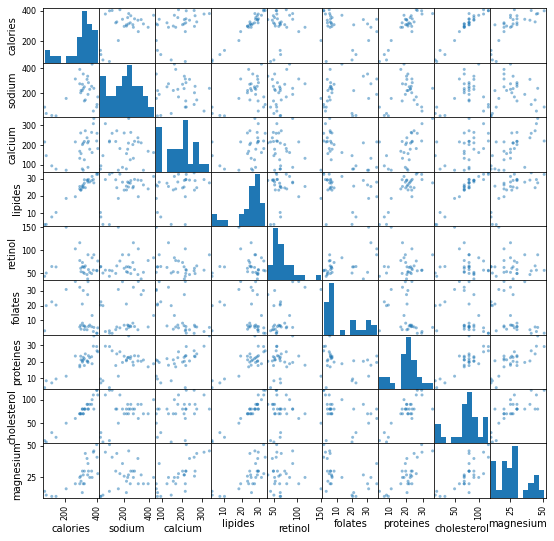

In [94]:
from pandas.plotting import scatter_matrix
# Croisement 2 à 2 des variables
scatter_matrix(fromage, figsize=(9,9))

Nous remarquons que les attributs suivants sont **positivement corrélés** :
- **calories - cholesterol**
- **calories - lipides**
- **lipides - cholesterol**
- **retinol - folates**

# Partie 2 : Méthode des centres mobiles

Dans l’algorithme **k-Means**, le nombre **k** de **clusters** est **fixé au départ**. A partir d'une partition initiale, nous cherchons à améliorer itérativement la partition en minimisant un certain critère.

Nous importerons le paquet **sklearn.cluster** pour utiliser la méthode **k-Means** de la classe **sklearn.cluster.KMeans**.

**À vous !**

In [95]:
import numpy as np
from sklearn import cluster
np.random.seed(0)
# Créer un modèle pour un ensemble de k centres
kmeans = cluster.KMeans(n_clusters = 4)
# Utiliser les données pour définir le modèle de clustering
kmeans.fit(fromage)
idk = np.argsort(kmeans.labels_)
print(pd.DataFrame(fromage.index[idk],kmeans.labels_[idk]))
print(kmeans.transform(fromage))

             Fromages
0         CarredelEst
0                Tome
0         PontlEveque
0           Chabichou
0            Chaource
0         Coulomniers
0  Fr.chevrepatemolle
1            Beaufort
1         SaintPaulin
1             Cheddar
1               Comte
1                Edam
1            Emmental
1            Vacherin
1            Parmesan
2       Petitsuisse40
2  Yaourtlaitent.nat.
2      Fr.frais20nat.
2      Fr.frais40nat.
3           Maroilles
3             Morbier
3              Cantal
3           Camembert
3            Pyrenees
3           Reblochon
3          Rocquefort
3                Bleu
3             Babybel
3         Fr.fondu.45
[[123.59715669 285.36163076 384.27301005 145.46927992]
 [110.54651897 118.43379084 303.10311983  71.72681089]
 [235.25665316  56.72603293 349.91323389 218.1879268 ]
 [159.09984736 200.30401971 393.76898843  45.60922494]
 [141.19170858 210.31138298 332.43471728  84.66051854]
 [180.75982487 111.73150994 371.97076666  86.99931839]
 [ 72.0404

In [96]:
# Donner les attributs des centres de chaque cluster
print(kmeans.cluster_centers_)

[[297.85714286 239.78571429 103.84285714  24.91428571  83.92857143
   23.05714286  18.97142857  71.42857143  21.71428571]
 [363.875      146.125      257.025       29.05        63.6
    3.8625      26.5625      96.25        38.875     ]
 [101.75        44.75       133.75         6.275       55.15
   16.475        7.2         18.25        11.25      ]
 [329.8        306.6        206.82        26.87        64.24
   11.91        21.08        82.          27.4       ]]


**Aide à la détection du nombre adéquat de groupes**

**K-Means**, ne fournit pas d’outils d’aide à la détection du nombre de classes. Nous devons les programmer sous Python ou utiliser des procédures proposées par des packages dédiés. Le schéma est souvent le même: nous faisons varier le nombre de groupes et nous surveillons l’évolution d’un indicateur de qualité de la solution c'est à dire l’aptitude des individus à être plus proches de ses congénères du même groupe que des individus des autres groupes.
Dans ce qui suit, nous allons calculer la métrique '**Silhouette**' pour différents nombres de groupes issus de la méthode des centres mobiles.

**À vous !**

[0.50681355 0.37299771 0.3282387  0.35737616 0.32267618 0.28114392
 0.29450378 0.23904343 0.25006247]


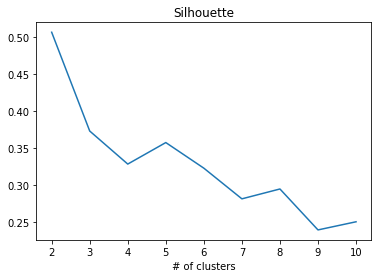

In [97]:
from sklearn import metrics
# Utilisation de la métrique "Silhouette"
res = np.arange(9, dtype ="double")
for k in np.arange(9):
  km = cluster.KMeans(n_clusters = k+2)
  km.fit(fromage)
  res[k] = metrics.silhouette_score(fromage,km.labels_)
print(res)
# Graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),(res))
plt.show()

**Quelle est la meilleure valeur de k (nombre de clusters) selon la métrique 'Silhouette' ?**

Le **score le plus élevé** est d'environ **0,5** pour un **nombre de clusters** égal à **2**. Cependant, il faut éviter d'utiliser une valeur de k égal à **2** car il s'agit d'un **cas limite**. Nous choisissons donc la valeur **5** qui a le meilleur score selon cette métrique.

Si nous choisissons un k qui est :

* **Très faible**: Risque que des éléments appartenant à un **même cluster** présentent des **dissimilitudes**.
* **Très élevé**: Risque que des éléments **n'appartenant pas au même cluster** soient **similaires**.

# Partie 3 : Classification ascendante hiérarchique

La **classification ascendante hiérarchique** (ou **CAH**) procède par fusions successives d'ensembles de points (clusters), en considérant initialement tous les points comme des clusters singletons, nous fusionnons à chaque étape les 2 clusters les plus proches au sens d'une
distance, jusqu'à obtenir un seul cluster contenant tous les points.
Nous allons exécuter l’algorithme **CAH** en utilisant le package **scipy**.

**À vous !**


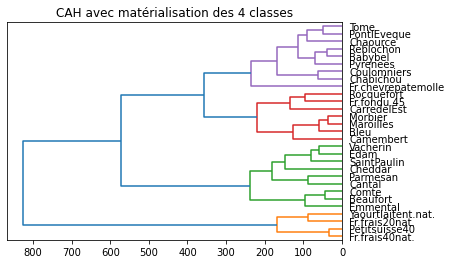

[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]
             Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat.
2         SaintPaulin
2            Beaufort
2              Cantal
2            Parmesan
2             Cheddar
2               Comte
2                Edam
2            Emmental
2            Vacherin
3          Rocquefort
3             Morbier
3           Maroilles
3         CarredelEst
3           Camembert
3                Bleu
3         Fr.fondu.45
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle


In [98]:
import pandas
import numpy as np
# Librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(fromage,method='ward', metric='euclidean')
# Affichage du dendrogramme
plt.title("CAH")
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=255)
plt.show()
groupes_cah = fcluster(Z, t = 255,criterion='distance')
print(groupes_cah)
# Index triés des groupes
idg = np.argsort(groupes_cah)
# Affichage des observations et leurs groupes
print(pandas.DataFrame(fromage.index[idg],groupes_cah[idg]))

Pour une **distance minimale de 255** entre **2 clusters**, nous obtenons **4 clusters**.

In [99]:
# Donner la correspondance entre les groupes de la CAH et les clusters de Kmeans
pd.crosstab(kmeans.labels_,groupes_cah, rownames=['k-Means'], colnames=['Linkage',])

Linkage,1,2,3,4
k-Means,,,,
0,0,0,1,6
1,0,8,0,0
2,4,0,0,0
3,0,1,6,3


Cluster **0** de **k-Means** (=) Cluster **4** de **Linkage**

Cluster **1** de **k-Means** (=) Cluster **2** de **Linkage**

Cluster **2** de **k-Means** (=) Cluster **1** de **Linkage**

Cluster **3** de **k-Means** (=) Cluster **3** de **Linkage**

Avec 2 exceptions : 
- **4 échantillons** du **4ème** cluster de **k-Means** ne font pas partie du **3ème** cluster de **Linkage**.
- **Un échantillon** du **1er** cluster de **k-Means** ne fait pas partie du **4ème** cluster de **Linkage**.

# Partie 4 : Interprétation des classes

**Analyse en composantes principales (ACP)**

L'ACP est une méthode de réduction de la dimensionnalité qui transforme un grand ensemble de variables en un ensemble plus petit qui contient toujours la plupart des informations du grand ensemble. Cela rend l'ensemble de données plus simple et donc plus facile à explorer, à visualiser et à analyser, au détriment de la précision.


**À vous !**

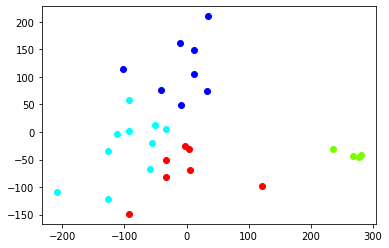

In [100]:
from sklearn.decomposition import PCA
acp = PCA(n_components =2).fit_transform(fromage)
for couleur,k in zip(['red','blue','lawngreen', 'aqua'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

# Compte rendu

Nous allons appliquer sur le même jeu de données, la méthode de **clustering CAH** du package **sklearn.cluster.AgglomerativeClustering**.

In [101]:
# AgglomerativeClustering utilise la distance de liaison pour fusionner récursivement les paires de clusters
from sklearn.cluster import AgglomerativeClustering
np.random.seed(0)
# Fournir le nombre de clusters à l'avance
agg_c = AgglomerativeClustering(n_clusters=4) 
agg_c.fit(fromage)
idk_ = np.argsort(agg_c.labels_)
print(pd.DataFrame(fromage.index[idk_],agg_c.labels_[idk_]))

             Fromages
0         SaintPaulin
0            Beaufort
0            Parmesan
0              Cantal
0             Cheddar
0               Comte
0            Vacherin
0                Edam
0            Emmental
1         CarredelEst
1          Rocquefort
1             Morbier
1           Maroilles
1         Fr.fondu.45
1           Camembert
1                Bleu
2         Coulomniers
2            Chaource
2           Chabichou
2         PontlEveque
2            Pyrenees
2           Reblochon
2             Babybel
2                Tome
2  Fr.chevrepatemolle
3      Fr.frais20nat.
3      Fr.frais40nat.
3       Petitsuisse40
3  Yaourtlaitent.nat.


In [102]:
# Donner la correspondance entre les clusters de Kmeans et AgglomerativeClustering
pd.crosstab(kmeans.labels_,agg_c.labels_, rownames=['k-Means'], colnames=['AgglomerativeClustering',])

AgglomerativeClustering,0,1,2,3
k-Means,,,,
0,0,1,6,0
1,8,0,0,0
2,0,0,0,4
3,1,6,3,0


Cluster **0** de **k-Means** (=) Cluster **2** de **AgglomerativeClustering**

Cluster **1** de **k-Means** (=) Cluster **0** de **AgglomerativeClustering**

Cluster **2** de **k-Means** (=) Cluster **3** de **AgglomerativeClustering**

Cluster **3** de **k-Means** (=) Cluster **1** de **AgglomerativeClustering**

Avec 2 exceptions : 
- **4 échantillons** du **4ème** cluster de **k-Means** ne font pas partie du **2ème** cluster de **AgglomerativeClustering**.
- **Un échantillon** du **1er** cluster de **k-Means** ne fait pas partie du **3ème** cluster de **AgglomerativeClustering**.



In [103]:
# Donner la correspondance entre les clusters de Linkage et AgglomerativeClustering
pd.crosstab(agg_c.labels_,groupes_cah, rownames=['Linkage'], colnames=['AgglomerativeClustering',])

AgglomerativeClustering,1,2,3,4
Linkage,,,,
0,0,9,0,0
1,0,0,7,0
2,0,0,0,9
3,4,0,0,0


Cluster **0** de **Linkage** (=) Cluster **2** de **AgglomerativeClustering**

Cluster **1** de **Linkage** (=) Cluster **3** de **AgglomerativeClustering**

Cluster **2** de **Linkage** (=) Cluster **4** de **AgglomerativeClustering**

Cluster **3** de **Linkage** (=) Cluster **1** de **AgglomerativeClustering**

Il existe une **forte correspondance** entre les clusters générés par les deux algorithmes **Linkage** et **AgglomerativeClustering**.

**Implémentation d'un algorithme hiérarchique descendant (divisive clustering) basé sur l’utilisation de k-means**

In [104]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
def divisive_clustering_using_kMeans(oldDataset, step_nbre = 0):
    if len(oldDataset)==1:
        step_nbre = step_nbre+1
        print("\n")
        print("###### Final Step",step_nbre,"######")
        print(" \n".join(pd.DataFrame(oldDataset).index))
        return
    else:
        # Préparer l'algorithme k-Means avec k = 2 pour séparer l'ensemble de données en deux nouveaux clusters
        km = cluster.KMeans(n_clusters = 2)
        km.fit(oldDataset)
        # Séparer le jeu de données en deux clusters
        tab0=[] # Les numéros des lignes du premier cluster
        tab1=[] # Les numéros des lignes du deuxième cluster
        for i  in np.arange(len(km.labels_)):
            if km.labels_[i]==0:
                tab0.append(i)
            elif km.labels_[i]==1:
                tab1.append(i)
        # Extraire les échantillons de chaque cluster
        sub0=oldDataset.iloc[tab0]
        sub1=oldDataset.iloc[tab1]
        step_nbre=step_nbre+1
        # Afficher les deux clusters
        print("\n")
        print("###### Step",step_nbre,"######")
        print("\n")
        print("First cluster for this step :\n")
        print(" \n".join(pd.DataFrame(sub0).index))
        print("\n")
        print("Second cluster for this step :\n")
        print(" \n".join(pd.DataFrame(sub1).index))
        # Continuez à diviser les clusters résultants
        divisive_clustering_using_kMeans(sub0,step_nbre)
        divisive_clustering_using_kMeans(sub1,step_nbre)
# Appeler la fonction divisive_clustering_using_kMeans
divisive_clustering_using_kMeans(fromage)



###### Step 1 ######


First cluster for this step :

CarredelEst 
Babybel 
Beaufort 
Bleu 
Camembert 
Cantal 
Chabichou 
Chaource 
Cheddar 
Comte 
Coulomniers 
Edam 
Emmental 
Fr.fondu.45 
Maroilles 
Morbier 
Parmesan 
PontlEveque 
Pyrenees 
Reblochon 
Rocquefort 
SaintPaulin 
Tome 
Vacherin


Second cluster for this step :

Fr.chevrepatemolle 
Fr.frais20nat. 
Fr.frais40nat. 
Petitsuisse40 
Yaourtlaitent.nat.


###### Step 2 ######


First cluster for this step :

CarredelEst 
Babybel 
Bleu 
Camembert 
Chabichou 
Chaource 
Coulomniers 
Fr.fondu.45 
Maroilles 
Morbier 
PontlEveque 
Pyrenees 
Reblochon 
Rocquefort 
Tome


Second cluster for this step :

Beaufort 
Cantal 
Cheddar 
Comte 
Edam 
Emmental 
Parmesan 
SaintPaulin 
Vacherin


###### Step 3 ######


First cluster for this step :

Babybel 
Chabichou 
Chaource 
Coulomniers 
PontlEveque 
Pyrenees 
Reblochon 
Tome


Second cluster for this step :

CarredelEst 
Bleu 
Camembert 
Fr.fondu.45 
Maroilles 
Morbier 
Rocquefort


###### 